# Import libraries

In [1]:
%pip install skimpy
%pip install category_encoders

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

# Data Cleaning
from skimpy import clean_columns

# Scikit-learn: Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline as SklearnPipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Additional Libraries
from category_encoders import TargetEncoder

# Class Imbalance Handling
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from collections import Counter

# Scikit-learn: Basics & Evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.base import BaseEstimator, TransformerMixin

# Scikit-learn: Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor

warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 1000)        # Show table width
pd.set_option('display.max_colwidth', None) # Show full content of each column
pd.set_option('display.max_rows', None)

In [4]:
np.random.seed(42)

# 1. Exploratory Data Analysis - EDA

## 1.1 Data Structure

### Import data

In [5]:
# URL_DATA = 'https://raw.githubusercontent.com/trieuhaivo/cap5771-project/refs/heads/main/t06_data.csv'

# DATA_FILENAME = 't06_data.csv'

# !wget -O $DATA_FILENAME $URL_DATA

In [6]:
df = pd.read_csv('t06_data.csv')


In [7]:
df.head()

,original_ID,name,store,food category,brand,f_FPro_class,price,price percal,package_weight,Protein,Total Fat,Carbohydrate,"Sugars, total","Fiber, total dietary",Calcium,Iron,Sodium,Cholesterol,"Fatty acids, total saturated"
0,wm_43236028,Petite Carrots,Walmart,produce-beans-wf,Produce Unbranded,0,1.88,0.013429,340.194000,1.175800,0.000000,12.228317,5.878998,2.351599,0.030571,0.000423,0.064199,0.000000,0.000000
1,tg_81910537,Dill-licious Salad Bowl - 5.75oz - Good &#38; Gather&#8482;,Target,produce-packaged,Good & Gather,3,3.49,0.010575,163.009625,9.815951,15.337423,4.785276,2.453988,0.613497,0.079755,0.000663,0.515337,0.030675,4.294479
2,wm_909761483,"Zatarain's Cheddar Jalapeno Cornbread Mix, 12.5 oz",Walmart,baking,Zatarain's,3,1.97,0.001516,354.368750,6.666667,0.000000,98.333333,30.000000,0.000000,0.000000,0.003600,0.760000,0.000000,0.000000
3,wf_icelandic-provisions-coconut-with-almonds-skyr-yogurt-44-oz-b089n69zkg,"Coconut With Almonds Skyr Yogurt, 4.4 oz",WholeFoods,dairy-yogurt-drink,Icelandic Provisions,3,1.99,0.011056,124.737800,8.818498,7.215134,12.297796,7.215134,0.000000,0.104219,0.000000,0.044894,0.020042,4.008408
4,tg_47981869,Alaska Grains Kodiak Wheat Bread - 24oz,Target,bread,Alaska Grains Baking Company,3,2.99,0.001875,637.863750,0.000000,3.125000,41.718750,3.125000,3.125000,0.071875,0.003125,0.421875,0.000000,0.000000


In [8]:
df.tail()

,original_ID,name,store,food category,brand,f_FPro_class,price,price percal,package_weight,Protein,Total Fat,Carbohydrate,"Sugars, total","Fiber, total dietary",Calcium,Iron,Sodium,Cholesterol,"Fatty acids, total saturated"
16619,wf_365-by-whole-foods-market-organic-yellow-corn-tortilla-rounds-salted-12-oz-b07dwcvn6c,"Organic Yellow Corn Tortilla Rounds Salted, 12 oz",WholeFoods,snacks-chips,365 by Whole Foods Market,3,2.99,0.001661,340.19400,7.054798,28.219193,63.493183,0.0000,7.054798,0.000000,0.001411,0.176370,0.000000,1.763700
16620,wm_13023471,"Great Value Tomato 100% Juice, 64 fl oz",Walmart,drink-juice,Great Value,2,1.94,0.004850,1920.00000,0.833333,0.000000,3.708333,2.5000,0.833333,0.021667,0.000300,0.234500,0.000000,0.000000
16621,wf_365-by-whole-foods-market-organic-shelfstable-lemonade-mango-64-fl-oz-b074h6r5zf,"Organic Shelf-Stable Lemonade, Mango, 64 fl oz",WholeFoods,drink-juice,365 by Whole Foods Market,3,3.29,0.005141,1920.00000,0.000000,0.000000,5.250000,8.7500,0.000000,0.000000,0.000000,0.012500,0.000000,0.000000
16622,wm_10402753,"Hillshire Farm¬Æ Ultra Thin Sliced Smoked Ham Deli Meat, 9 oz",Walmart,meat-packaged,Hillshire Farm,3,3.28,0.012148,255.14550,15.873296,4.409249,1.569693,1.7637,0.000000,0.000000,0.000635,0.742341,0.044092,1.763700
16623,wf_milkman-instant-lowfat-dry-milk-344-oz-b0733p3z93,"Instant Lowfat Dry Milk, 3.44 oz",WholeFoods,milk-milk-substitute,Milkman,0,2.39,0.006257,97.52228,33.333333,5.833333,59.000000,50.0000,0.000000,1.125000,0.000000,0.448500,0.037500,3.333333


In [9]:
df.sample(5)

,original_ID,name,store,food category,brand,f_FPro_class,price,price percal,package_weight,Protein,Total Fat,Carbohydrate,"Sugars, total","Fiber, total dietary",Calcium,Iron,Sodium,Cholesterol,"Fatty acids, total saturated"
11073,wm_24107833,"Wilton Buttercream Icing Mix, 14 oz",Walmart,culinary-ingredients,Wilton,3,0.88,0.000517,396.89300,0.000000,3.571429,102.142857,89.285714,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1163,tg_14826449,Cornbread Mini Loaves - 12oz/6ct - Favorite Day&#8482;,Target,bread,Favorite Day,3,3.29,0.002625,340.19400,7.017544,17.543860,33.157895,17.543860,1.754386,0.140351,0.001754,0.302632,0.035088,1.754386
700,wm_10295398,"Kraft Three Cheese Blend Grated Cheese, 8 oz Shaker",Walmart,cheese,Kraft,2,3.48,0.003836,226.79600,40.000000,30.000000,0.000000,0.000000,0.000000,1.560000,0.000000,1.350000,0.120000,20.000000
2701,wf_produce-organic-potatoes-yellow-3-pound-b07q7wspl2,Organic Potatoes Yellow 3 Pound,WholeFoods,produce-beans-wf,PRODUCE,0,3.99,0.011425,453.59237,2.049765,0.089202,10.422535,0.820188,2.112676,0.012207,0.000798,0.005493,0.000000,0.023474
15014,wm_970023266,"Oui by Yoplait French Style Yogurt, Key Lime, Non-GMO, Gluten Free, 5.0 oz",Walmart,dairy-yogurt-drink,OUI,3,1.34,0.008331,141.74750,3.546099,4.964539,17.517730,10.638298,0.000000,0.138298,0.000000,0.109220,0.017730,3.546099


### Data Shape

In [10]:
df.shape

(16624, 19)

### Data Types

In [11]:
df.dtypes

original_ID                      object
name                             object
store                            object
food category                    object
brand                            object
f_FPro_class                      int64
price                           float64
price percal                    float64
package_weight                  float64
Protein                         float64
Total Fat                       float64
Carbohydrate                    float64
Sugars, total                   float64
Fiber, total dietary            float64
Calcium                         float64
Iron                            float64
Sodium                          float64
Cholesterol                     float64
Fatty acids, total saturated    float64
dtype: object

### Attribute Values

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16624 entries, 0 to 16623
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   original_ID                   16624 non-null  object 
 1   name                          16624 non-null  object 
 2   store                         16624 non-null  object 
 3   food category                 16624 non-null  object 
 4   brand                         16582 non-null  object 
 5   f_FPro_class                  16624 non-null  int64  
 6   price                         16624 non-null  float64
 7   price percal                  16624 non-null  float64
 8   package_weight                16624 non-null  float64
 9   Protein                       16624 non-null  float64
 10  Total Fat                     16624 non-null  float64
 11  Carbohydrate                  16624 non-null  float64
 12  Sugars, total                 16616 non-null  float64
 13  F

### Missing Values

In [13]:
df.isnull().sum()

original_ID                      0
name                             0
store                            0
food category                    0
brand                           42
f_FPro_class                     0
price                            0
price percal                     0
package_weight                   0
Protein                          0
Total Fat                        0
Carbohydrate                     0
Sugars, total                    8
Fiber, total dietary             8
Calcium                          0
Iron                             0
Sodium                           0
Cholesterol                      0
Fatty acids, total saturated     8
dtype: int64

=> Have few missing values

## 1.2 Target Distribution

In [14]:
df['f_FPro_class'].unique()

array([0, 3, 2, 1])

In [15]:
df['f_FPro_class'].value_counts().sort_index()

f_FPro_class
0     1897
1      331
2     1526
3    12870
Name: count, dtype: int64

## 1.3 Descriptive Statistics

### Summary Statistics

In [16]:
df.describe().transpose().round(3)

,count,mean,std,min,25%,50%,75%,max
f_FPro_class,16624.0,2.526,0.987,0.00,3.000,3.000,3.000,3.000
price,16624.0,4.635,3.725,0.03,2.500,3.790,5.690,72.990
price percal,16624.0,0.029,0.328,0.00,0.003,0.006,0.012,15.072
package_weight,16624.0,462.751,2244.905,1.36,198.446,340.194,479.107,272155.422
Protein,16624.0,8.912,9.138,0.00,3.125,6.977,12.000,294.643
Total Fat,16624.0,13.249,14.784,0.00,1.770,8.549,21.164,266.667
Carbohydrate,16624.0,33.288,31.271,0.00,7.936,26.250,53.400,880.952
"Sugars, total",16616.0,12.412,17.203,0.00,0.962,4.167,18.182,178.947
"Fiber, total dietary",16616.0,3.206,5.058,0.00,0.000,1.667,3.571,125.000
Calcium,16624.0,0.098,0.211,0.00,0.000,0.036,0.114,9.750


=> different variables have different scales, all of them have outliers (max)

### Boxplots

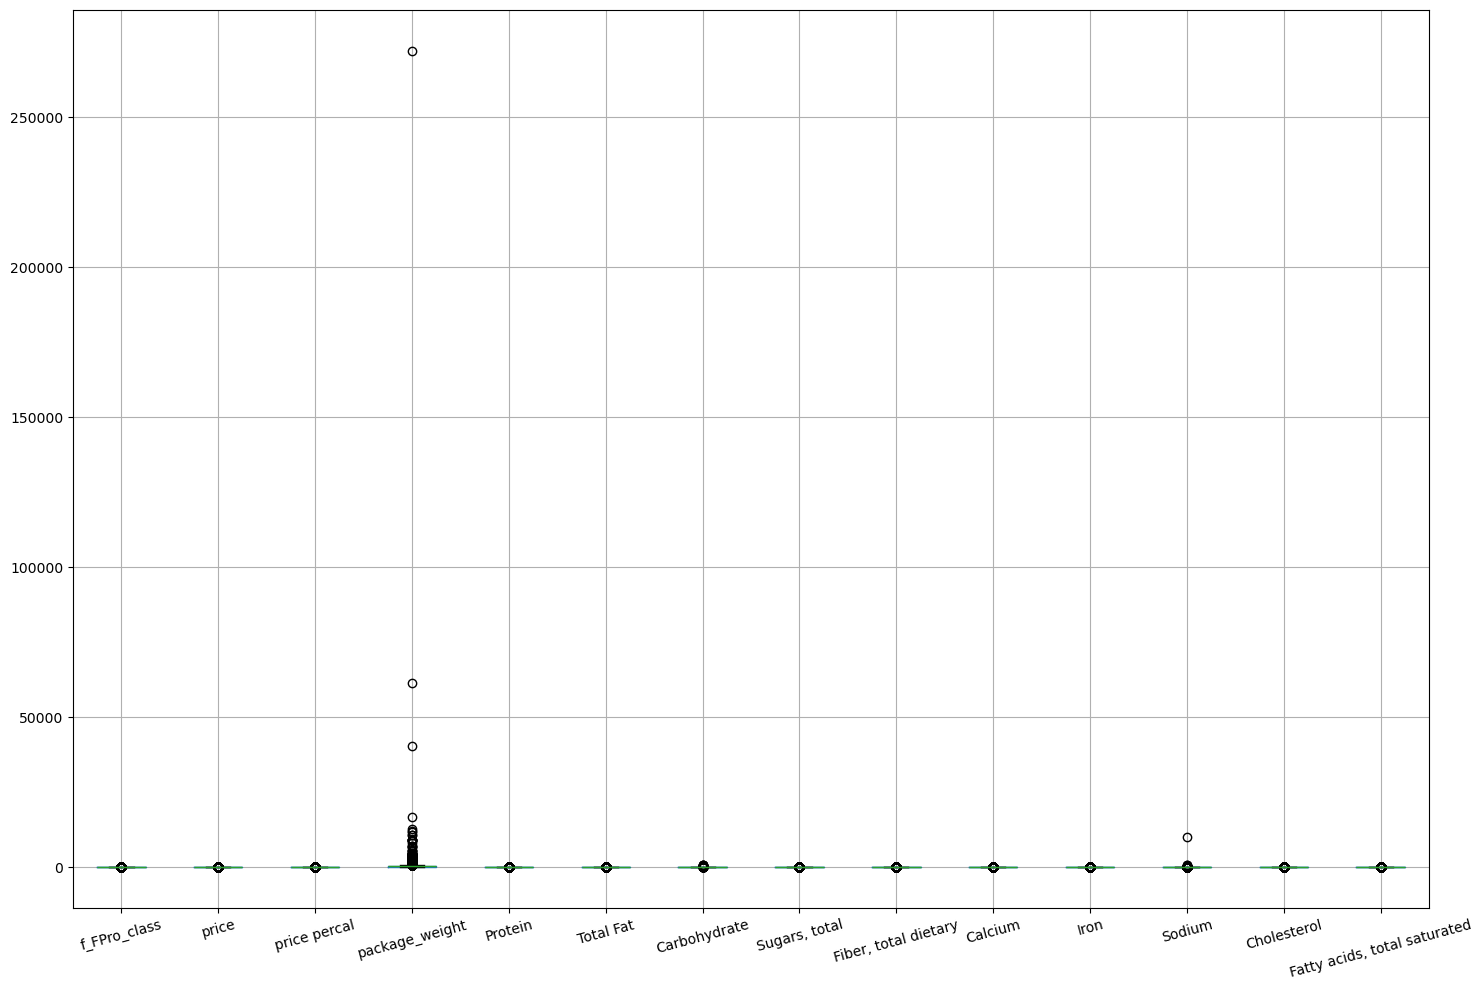

In [17]:
ax = df.boxplot(figsize=(15, 10))

ax.tick_params(axis='x', rotation=15)

plt.tight_layout()

plt.show()

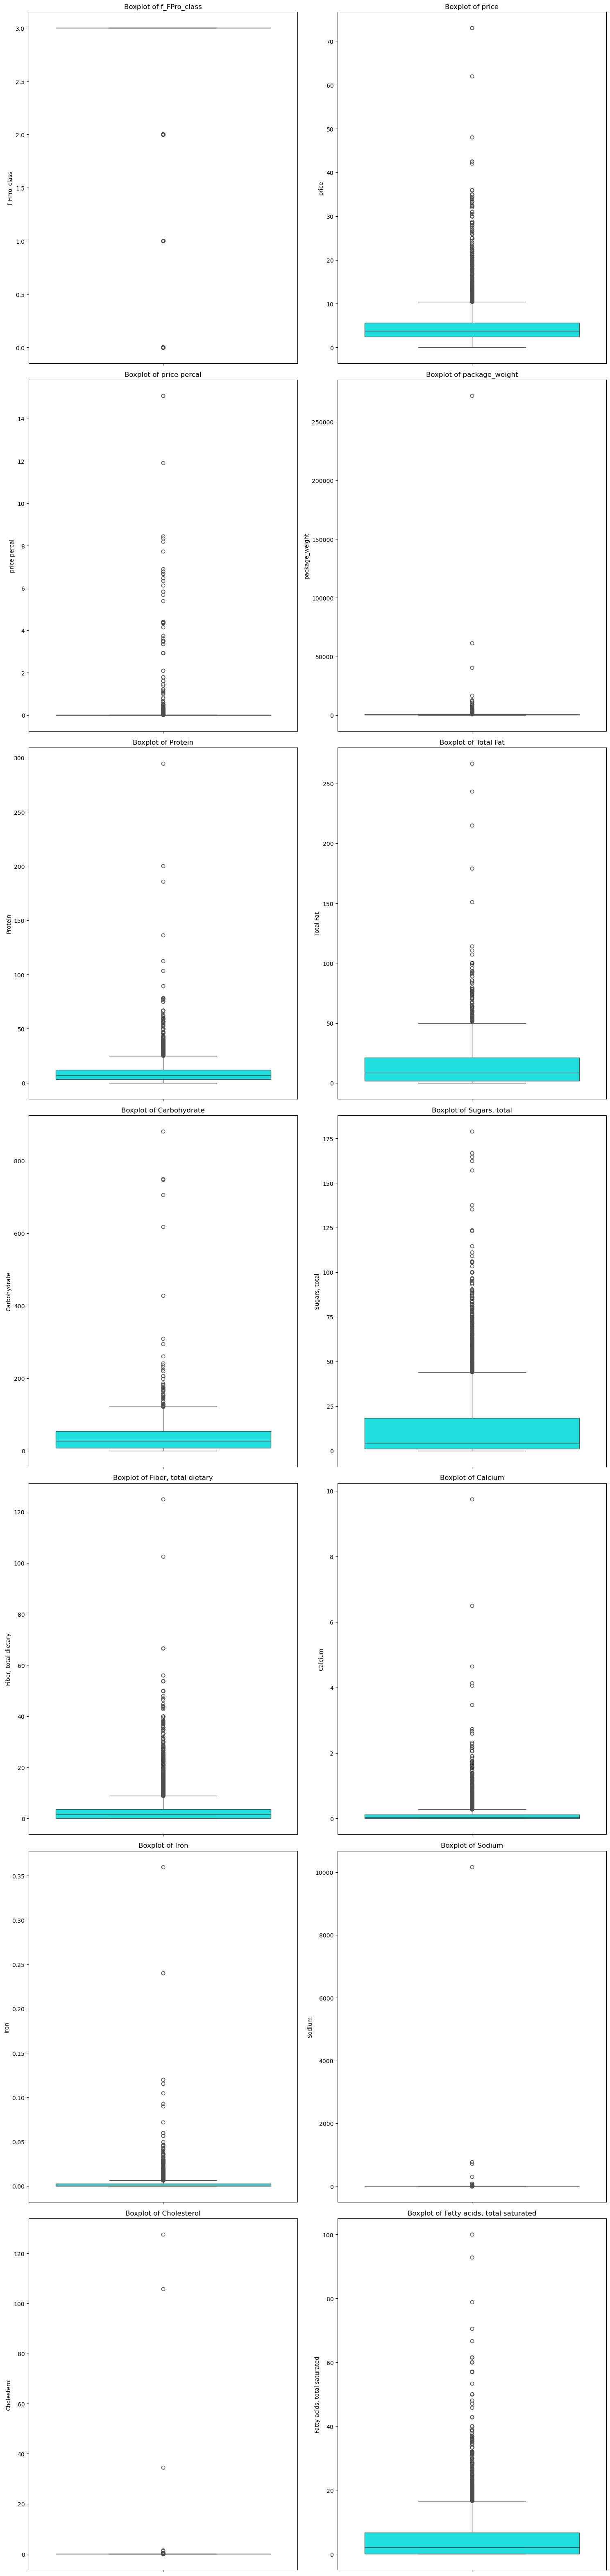

In [18]:
numeric_columns = df.select_dtypes(include=['number']).columns
n_cols = 2
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 9*n_rows))
axes = axes.flatten() if n_rows > 1 else axes

for i, col in enumerate(numeric_columns):
    if i < len(axes):
        sns.boxplot(y=df[col], ax=axes[i], color='cyan')
        axes[i].set_title(f'Boxplot of {col}')

for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

=> A lot of outliers

### Histograms

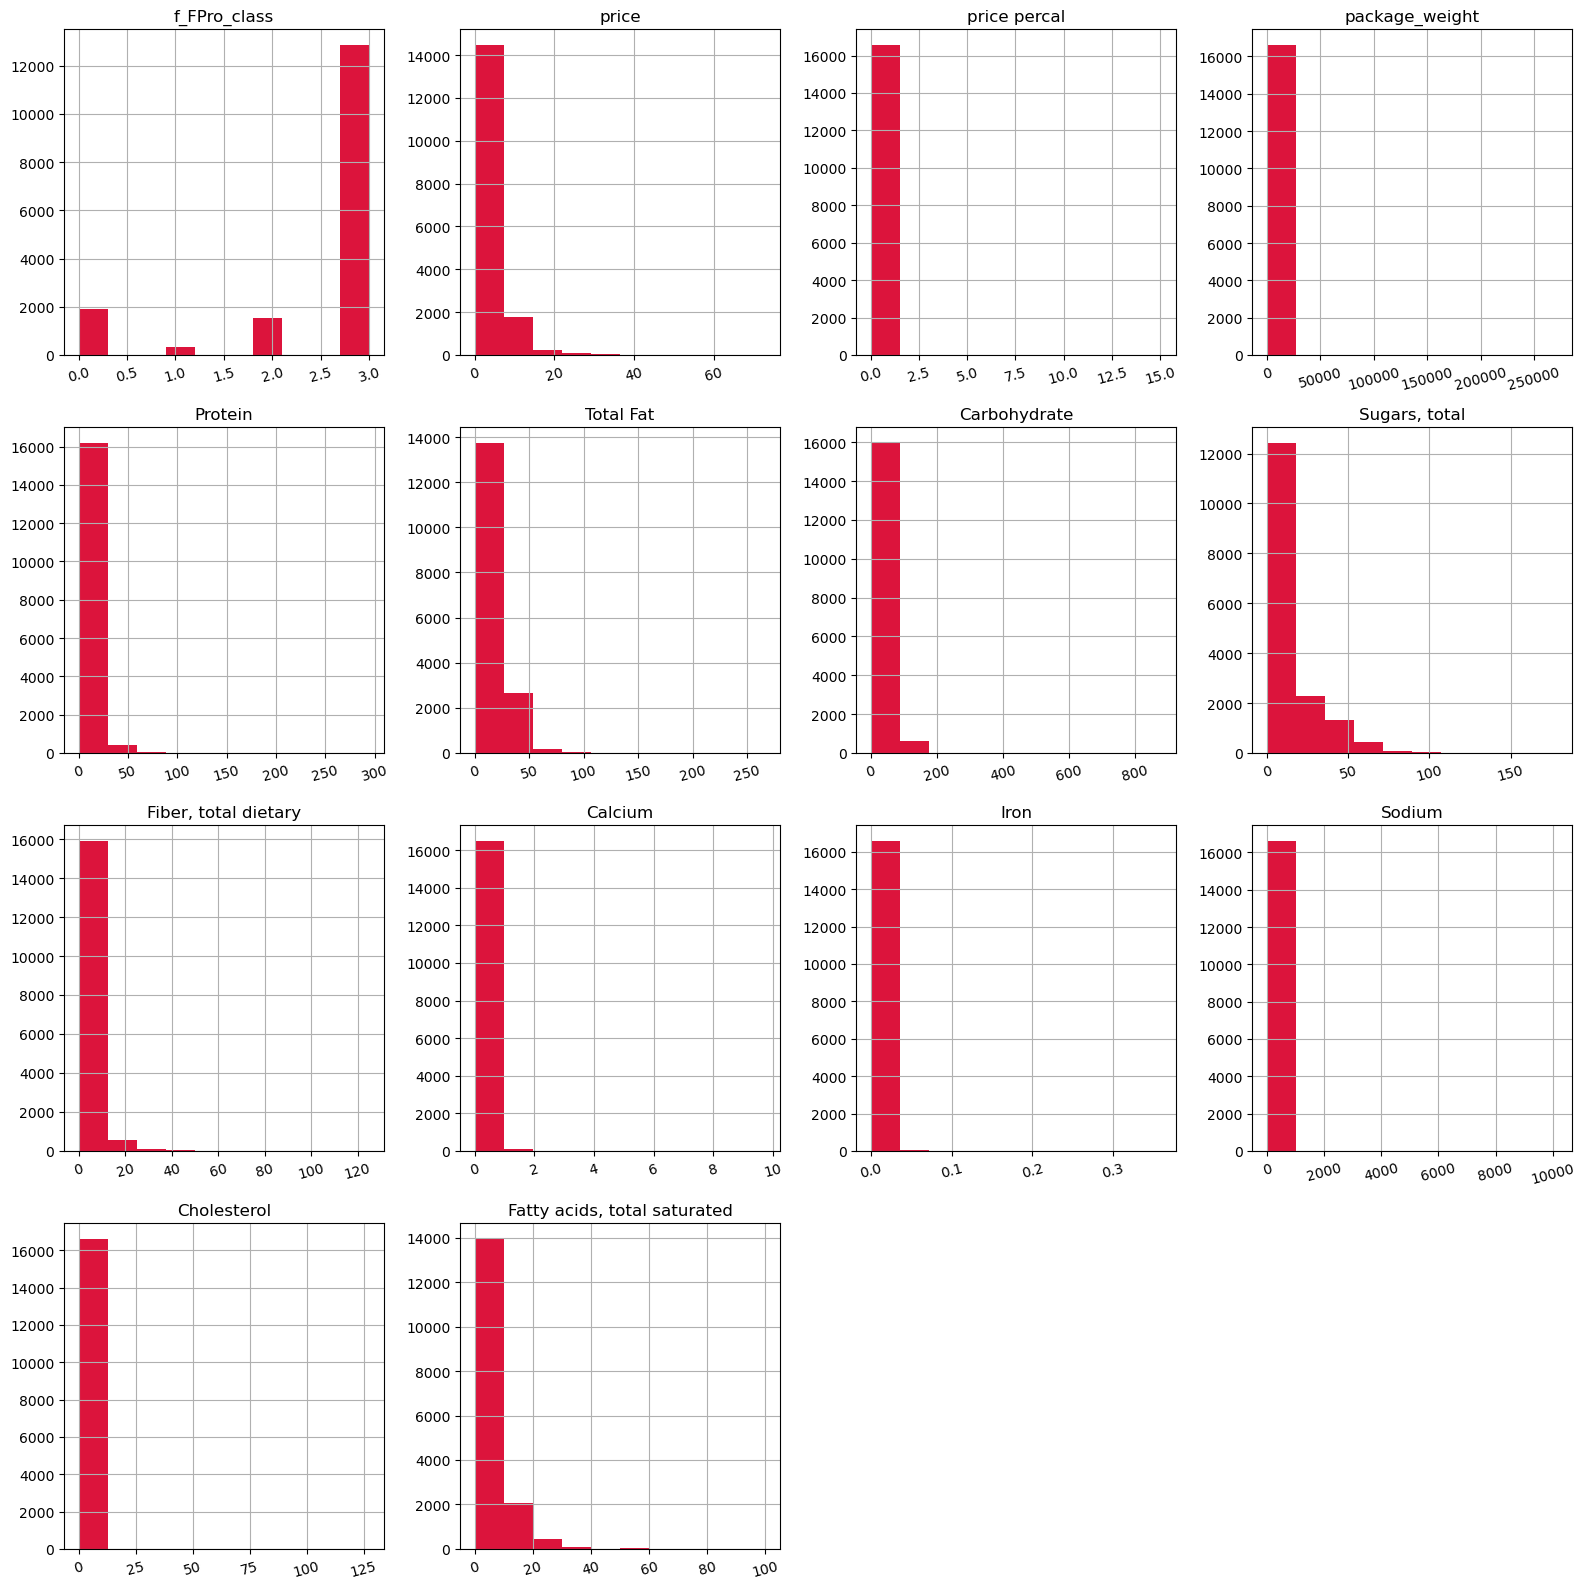

In [19]:
axes = df.hist(figsize=(16, 16), color='crimson')

for ax in axes.flatten():
    ax.tick_params(axis='x', rotation=15)

plt.tight_layout()
plt.show()

=> highly skewed data, most variables have small values, from 0 to 10

### Clean column names: lowercase

In [20]:
df = clean_columns(df)
df.columns.tolist()

['original_id',
 'name',
 'store',
 'food_category',
 'brand',
 'f_f_pro_class',
 'price',
 'price_percal',
 'package_weight',
 'protein',
 'total_fat',
 'carbohydrate',
 'sugars_total',
 'fiber_total_dietary',
 'calcium',
 'iron',
 'sodium',
 'cholesterol',
 'fatty_acids_total_saturated']

In [21]:
df.head()

,original_id,name,store,food_category,brand,f_f_pro_class,price,price_percal,package_weight,protein,total_fat,carbohydrate,sugars_total,fiber_total_dietary,calcium,iron,sodium,cholesterol,fatty_acids_total_saturated
0,wm_43236028,Petite Carrots,Walmart,produce-beans-wf,Produce Unbranded,0,1.88,0.013429,340.194000,1.175800,0.000000,12.228317,5.878998,2.351599,0.030571,0.000423,0.064199,0.000000,0.000000
1,tg_81910537,Dill-licious Salad Bowl - 5.75oz - Good &#38; Gather&#8482;,Target,produce-packaged,Good & Gather,3,3.49,0.010575,163.009625,9.815951,15.337423,4.785276,2.453988,0.613497,0.079755,0.000663,0.515337,0.030675,4.294479
2,wm_909761483,"Zatarain's Cheddar Jalapeno Cornbread Mix, 12.5 oz",Walmart,baking,Zatarain's,3,1.97,0.001516,354.368750,6.666667,0.000000,98.333333,30.000000,0.000000,0.000000,0.003600,0.760000,0.000000,0.000000
3,wf_icelandic-provisions-coconut-with-almonds-skyr-yogurt-44-oz-b089n69zkg,"Coconut With Almonds Skyr Yogurt, 4.4 oz",WholeFoods,dairy-yogurt-drink,Icelandic Provisions,3,1.99,0.011056,124.737800,8.818498,7.215134,12.297796,7.215134,0.000000,0.104219,0.000000,0.044894,0.020042,4.008408
4,tg_47981869,Alaska Grains Kodiak Wheat Bread - 24oz,Target,bread,Alaska Grains Baking Company,3,2.99,0.001875,637.863750,0.000000,3.125000,41.718750,3.125000,3.125000,0.071875,0.003125,0.421875,0.000000,0.000000


### Check duplicates

In [22]:
df.duplicated().sum()

np.int64(0)

### Check correlation

In [23]:
correlation_matrix = df.corr(numeric_only=True)
print(correlation_matrix)

                             f_f_pro_class     price  price_percal  package_weight   protein  total_fat  carbohydrate  sugars_total  fiber_total_dietary   calcium      iron    sodium  cholesterol  fatty_acids_total_saturated
f_f_pro_class                     1.000000 -0.062315     -0.136569       -0.019034 -0.089428   0.046054      0.214454      0.219957            -0.062139 -0.023260 -0.041965  0.005279    -0.001947                     0.048620
price                            -0.062315  1.000000      0.100461        0.068502  0.224469   0.103939     -0.100005     -0.032910             0.090768  0.024968  0.036654 -0.006891    -0.000657                     0.068197
price_percal                     -0.136569  0.100461      1.000000       -0.007411 -0.045993  -0.060061     -0.068735     -0.045346            -0.035360 -0.024868 -0.018041 -0.000969    -0.001524                    -0.047043
package_weight                   -0.019034  0.068502     -0.007411        1.000000 -0.024468  -0.032

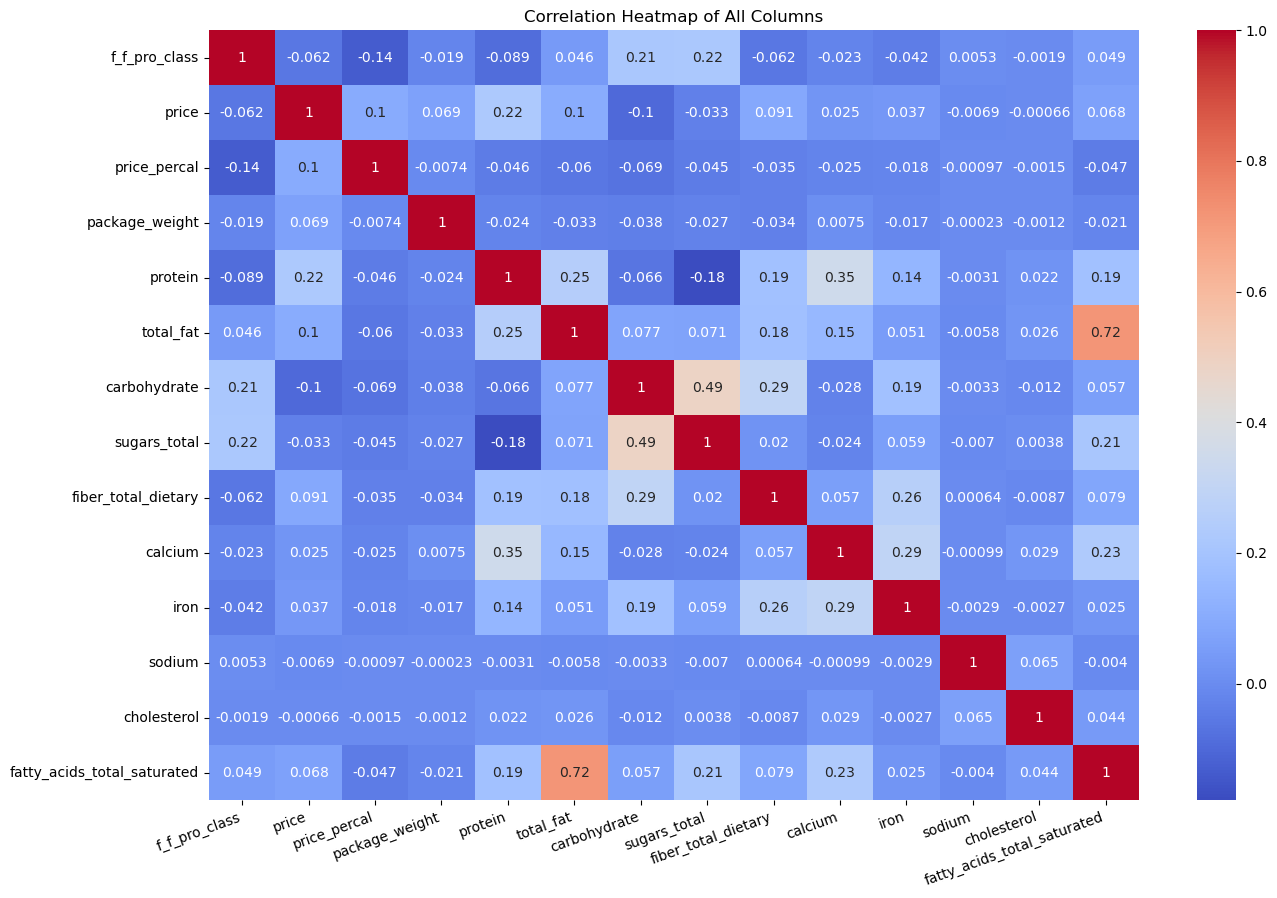

In [24]:
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of All Columns")

ax = plt.gca()

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=20,
    horizontalalignment='right'
)

plt.show()

# 2. Data Preprocessing

## 2.1 Target Construction

### Convert target variable to binary values: 0, 1, 2 -> 1 (healthy) ; 3 -> 0 (bad)

In [25]:
df['target'] = np.where(df['f_f_pro_class'] == 3, 0, 1)

In [26]:
df.head()

,original_id,name,store,food_category,brand,f_f_pro_class,price,price_percal,package_weight,protein,total_fat,carbohydrate,sugars_total,fiber_total_dietary,calcium,iron,sodium,cholesterol,fatty_acids_total_saturated,target
0,wm_43236028,Petite Carrots,Walmart,produce-beans-wf,Produce Unbranded,0,1.88,0.013429,340.194000,1.175800,0.000000,12.228317,5.878998,2.351599,0.030571,0.000423,0.064199,0.000000,0.000000,1
1,tg_81910537,Dill-licious Salad Bowl - 5.75oz - Good &#38; Gather&#8482;,Target,produce-packaged,Good & Gather,3,3.49,0.010575,163.009625,9.815951,15.337423,4.785276,2.453988,0.613497,0.079755,0.000663,0.515337,0.030675,4.294479,0
2,wm_909761483,"Zatarain's Cheddar Jalapeno Cornbread Mix, 12.5 oz",Walmart,baking,Zatarain's,3,1.97,0.001516,354.368750,6.666667,0.000000,98.333333,30.000000,0.000000,0.000000,0.003600,0.760000,0.000000,0.000000,0
3,wf_icelandic-provisions-coconut-with-almonds-skyr-yogurt-44-oz-b089n69zkg,"Coconut With Almonds Skyr Yogurt, 4.4 oz",WholeFoods,dairy-yogurt-drink,Icelandic Provisions,3,1.99,0.011056,124.737800,8.818498,7.215134,12.297796,7.215134,0.000000,0.104219,0.000000,0.044894,0.020042,4.008408,0
4,tg_47981869,Alaska Grains Kodiak Wheat Bread - 24oz,Target,bread,Alaska Grains Baking Company,3,2.99,0.001875,637.863750,0.000000,3.125000,41.718750,3.125000,3.125000,0.071875,0.003125,0.421875,0.000000,0.000000,0


In [27]:
df['target'].value_counts()

target
0    12870
1     3754
Name: count, dtype: int64

## 2.2 Feature Creation & Selection

In [28]:
df['store'].unique()

array(['Walmart', 'Target', 'WholeFoods'], dtype=object)

In [29]:
df['store'].value_counts()

store
Walmart       5948
WholeFoods    5640
Target        5036
Name: count, dtype: int64

In [30]:
df['food_category'].unique()

array(['produce-beans-wf', 'produce-packaged', 'baking',
       'dairy-yogurt-drink', 'bread', 'cookies-biscuit',
       'pastry-chocolate-candy', 'cheese', 'rolls-buns-wraps',
       'sauce-all', 'coffee-beans-wf', 'prepared-meals-dishes', 'cereal',
       'sausage-bacon', 'snacks-chips', 'meat-packaged',
       'ice-cream-dessert', 'snacks-bars', 'drink-juice',
       'drink-shakes-other', 'snacks-dips-salsa', 'snacks-nuts-seeds',
       'snacks-mixes-crackers', 'nuts-seeds-wf', 'jerky',
       'rice-grains-wf', 'spread-squeeze', 'dressings', 'pizza',
       'snacks-popcorn', 'breakfast', 'milk-milk-substitute',
       'pasta-noodles', 'drink-coffee', 'meat-poultry-wf', 'seafood',
       'mac-cheese', 'spices-seasoning', 'soup-stew', 'cakes',
       'pudding-jello', 'rice-grains-packaged', 'salad', 'muffins-bagels',
       'culinary-ingredients', 'baby-food', 'drink-tea', 'eggs-wf',
       'drink-soft-energy-mixes'], dtype=object)

In [31]:
df['food_category'].value_counts()

food_category
prepared-meals-dishes      1279
pastry-chocolate-candy     1053
snacks-bars                 913
cookies-biscuit             779
produce-packaged            770
snacks-mixes-crackers       744
snacks-chips                696
produce-beans-wf            635
cheese                      625
meat-packaged               595
dairy-yogurt-drink          537
cereal                      528
ice-cream-dessert           511
bread                       431
rolls-buns-wraps            416
sauce-all                   408
soup-stew                   394
dressings                   341
seafood                     330
sausage-bacon               316
drink-juice                 310
pizza                       271
cakes                       249
baking                      249
snacks-nuts-seeds           238
snacks-dips-salsa           221
breakfast                   198
milk-milk-substitute        195
spread-squeeze              190
drink-shakes-other          185
jerky                     

In [32]:
df['brand'].unique()

array(['Produce Unbranded', 'Good & Gather', "Zatarain's", ..., 'Millers',
       'Nerds', 'Milkman'], shape=(2398,), dtype=object)

### Drop unnecessary features: original_ID, name, brand, f_FPro_class

In [33]:
columns_to_drop = ['original_id', 'name', 'food_category', 'brand', 'f_f_pro_class']
df = df.drop(columns = columns_to_drop)

In [34]:
df.head()

,store,price,price_percal,package_weight,protein,total_fat,carbohydrate,sugars_total,fiber_total_dietary,calcium,iron,sodium,cholesterol,fatty_acids_total_saturated,target
0,Walmart,1.88,0.013429,340.194000,1.175800,0.000000,12.228317,5.878998,2.351599,0.030571,0.000423,0.064199,0.000000,0.000000,1
1,Target,3.49,0.010575,163.009625,9.815951,15.337423,4.785276,2.453988,0.613497,0.079755,0.000663,0.515337,0.030675,4.294479,0
2,Walmart,1.97,0.001516,354.368750,6.666667,0.000000,98.333333,30.000000,0.000000,0.000000,0.003600,0.760000,0.000000,0.000000,0
3,WholeFoods,1.99,0.011056,124.737800,8.818498,7.215134,12.297796,7.215134,0.000000,0.104219,0.000000,0.044894,0.020042,4.008408,0
4,Target,2.99,0.001875,637.863750,0.000000,3.125000,41.718750,3.125000,3.125000,0.071875,0.003125,0.421875,0.000000,0.000000,0


# DATA SPLIT TO AVOID DATA LEAKAGE

In [35]:
from sklearn.model_selection import train_test_split

# PREPARE FEATURES AND TARGET
# Target column is 'target'
X = df.drop('target', axis=1)  # All columns EXCEPT the target
y = df['target']               # Only the target column

# DATA SPLIT
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    stratify=y,            # MAINTAIN CLASS PROPORTION
    test_size=0.2,         # 80% train, 20% temp (val + test)
    random_state=42        # Ensures reproducible results
)

# SECOND SPLIT: Split temp into val and test (50% each of the 20% = 10% val, 10% test)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    stratify=y_temp,       # MAINTAIN CLASS PROPORTION in val and test
    test_size=0.5,         # 50% val, 50% test (of the original 20%)
    random_state=42        # Ensures reproducible results
)

print(f"Overall dataset: {df.shape}")
print(f"Train set: {X_train.shape}")
print(f"Validation set: {X_val.shape}")
print(f"Test set: {X_test.shape}")

# CHECK CLASS DISTRIBUTION
print("\nCLASS DISTRIBUTION:")
print("Overall dataset:", y.value_counts(normalize=True))
print("Train set:", y_train.value_counts(normalize=True))
print("Validation set:", y_val.value_counts(normalize=True))
print("Test set:", y_test.value_counts(normalize=True))

Overall dataset: (16624, 15)
Train set: (13299, 14)
Validation set: (1662, 14)
Test set: (1663, 14)

CLASS DISTRIBUTION:
Overall dataset: target
0    0.774182
1    0.225818
Name: proportion, dtype: float64
Train set: target
0    0.774194
1    0.225806
Name: proportion, dtype: float64
Validation set: target
0    0.774368
1    0.225632
Name: proportion, dtype: float64
Test set: target
0    0.773903
1    0.226097
Name: proportion, dtype: float64


### Function to handle outliers

In [36]:
class IQR_Outlier_Capper(BaseEstimator, TransformerMixin):
    """
    Caps (clips) values outside of 1.5 * IQR.
    """
    def __init__(self, factor=1.5):
        self.factor = factor
        self.lower_bound_ = {}
        self.upper_bound_ = {}
        self.feature_names_in_ = None # Store input column names

    def fit(self, X, y=None):
        X = pd.DataFrame(X)
        self.feature_names_in_ = X.columns.tolist() # Store column names
        for col in X.columns:
            Q1 = X[col].quantile(0.25)
            Q3 = X[col].quantile(0.75)
            IQR = Q3 - Q1
            self.lower_bound_[col] = Q1 - (self.factor * IQR)
            self.upper_bound_[col] = Q3 + (self.factor * IQR)
        return self

    def transform(self, X):
        X = pd.DataFrame(X).copy()
        # Ensure that the column order in X is the same as the fitted column order
        X = X[self.feature_names_in_]
        for col in X.columns:
            X[col] = np.where(X[col] < self.lower_bound_[col], self.lower_bound_[col], X[col])
            X[col] = np.where(X[col] > self.upper_bound_[col], self.upper_bound_[col], X[col])
        return X.values

    def get_feature_names_out(self, input_features=None):
        # Return the original column names
        if input_features is None:
            return np.asarray(self.feature_names_in_, dtype=object)
        else:
            return np.asarray(input_features, dtype=object)


In [37]:
all_features = X_train.columns

# Categorical variables: store (One-Hot), food_category (Target)
cat_ohe = ['store']
# cat_target = ['food_category']
cat_target = []

# Numerical variables: All remaining variables (after excluding categorical ones)
numeric_features = [f for f in all_features if f not in cat_ohe + cat_target]

### Pipeline for numerical variables (Imputer, Outlier, Scaler)

In [38]:
# 1. Pipeline for numerical variables (Imputer, Outlier, Scaler)
numeric_pipeline = SklearnPipeline(steps=[
    ('imputer', IterativeImputer(
        estimator=RandomForestRegressor(n_estimators=10, random_state=42),
        max_iter=10,
        random_state=42)),
    # ('outlier_capper', IQR_Outlier_Capper(factor=1.5)), # This is for question 4. Outlier Detection
    ('scaler', RobustScaler())
])

### Pipeline for categorical variables (One-Hot Encoding)

In [39]:
# 2. Pipeline for categorical variables (One-Hot Encoding)
categorical_ohe_pipeline = SklearnPipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # Impute with mode
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

### Pipeline for categorical variables (Target Encoding)

In [40]:
# 3. Pipeline for categorical variables (Target Encoding)
categorical_target_pipeline = SklearnPipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # Impute with mode
    ('target', TargetEncoder())
])

### Bigger pipeline

In [41]:
# 4. ColumnTransformer (All Imputers are placed inside)
preprocessor = ColumnTransformer(
    transformers=[
        # Handle all steps for numerical variables: Impute -> Cap -> Scale
        ('num_pipe', numeric_pipeline, numeric_features),
        # Handle all steps for OHE categorical variables: Impute -> OHE
        ('cat_ohe_pipe', categorical_ohe_pipeline, cat_ohe),
        # Handle all steps for Target categorical variables: Impute -> Target Encoding
        ('cat_target_pipe', categorical_target_pipeline, cat_target)
    ],
    remainder='passthrough'
)

### Apply pipeline for preprocessing for X_train, X_val, X_test

In [42]:
# FIT the ColumnTransformer (preprocessor) directly
print("Starting FIT Preprocessor on X_train...")
preprocessor.fit(X_train[all_features], y_train)
print("FIT completed.")

# 1. Get the column names after transformation
feature_names = preprocessor.get_feature_names_out()

# 2. TRANSFORM X_train, X_val, X_test (Call transform only once per set)
X_train_processed = preprocessor.transform(X_train[all_features])
X_val_processed = preprocessor.transform(X_val[all_features])
X_test_processed = preprocessor.transform(X_test[all_features])

# 3. Convert to DataFrame
X_train_processed_df = pd.DataFrame(X_train_processed, columns=feature_names)
X_val_processed_df = pd.DataFrame(X_val_processed, columns=feature_names)
X_test_processed_df = pd.DataFrame(X_test_processed, columns=feature_names)

Starting FIT Preprocessor on X_train...
FIT completed.


In [43]:
X_train_processed_df.head()

,num_pipe__price,num_pipe__price_percal,num_pipe__package_weight,num_pipe__protein,num_pipe__total_fat,num_pipe__carbohydrate,num_pipe__sugars_total,num_pipe__fiber_total_dietary,num_pipe__calcium,num_pipe__iron,num_pipe__sodium,num_pipe__cholesterol,num_pipe__fatty_acids_total_saturated,cat_ohe_pipe__store_Target,cat_ohe_pipe__store_Walmart,cat_ohe_pipe__store_WholeFoods
0,-0.871875,-0.379797,-0.202020,-0.391286,-0.415009,-0.029391,-0.184358,-0.261927,-0.151536,-0.290819,-0.596461,0.000000,-0.306122,0.0,1.0,0.0
1,-0.187500,0.100440,-0.888889,-0.037559,1.965832,0.559934,0.939048,3.179167,-0.020769,7.209179,-0.617319,0.000000,4.193878,0.0,0.0,1.0
2,1.625000,5.039686,-0.606061,0.669428,0.164783,-0.456120,-0.247118,-0.454167,0.488924,-0.109554,0.613938,4.941177,-0.041417,1.0,0.0,0.0
3,-0.725000,1.328431,0.498133,-0.788732,-0.442312,-0.494851,-0.247118,-0.454167,-0.311533,-0.438966,0.859346,0.000000,-0.306122,0.0,1.0,0.0
4,-0.562500,-0.504142,0.404042,0.788732,-0.339106,0.555550,-0.128501,1.180833,-0.119629,0.338811,-0.617319,0.000000,-0.306122,1.0,0.0,0.0


In [44]:
X_val_processed_df.head()

,num_pipe__price,num_pipe__price_percal,num_pipe__package_weight,num_pipe__protein,num_pipe__total_fat,num_pipe__carbohydrate,num_pipe__sugars_total,num_pipe__fiber_total_dietary,num_pipe__calcium,num_pipe__iron,num_pipe__sodium,num_pipe__cholesterol,num_pipe__fatty_acids_total_saturated,cat_ohe_pipe__store_Target,cat_ohe_pipe__store_Walmart,cat_ohe_pipe__store_WholeFoods
0,-0.250000,-0.209535,-0.505051,2.341158,0.991107,-0.579903,-0.247118,-0.454167,6.618345,-0.438966,-0.336490,4.666667,2.610544,1.0,0.0,0.0
1,0.625000,1.027958,-0.888889,0.338028,1.449801,0.516094,-0.049424,4.995833,0.269995,-0.438966,-0.268463,0.933334,2.693878,0.0,0.0,1.0
2,-0.246875,-0.447781,0.242424,-0.457332,0.088896,0.854564,1.671680,-0.454167,-0.311533,-0.438966,0.223014,0.000000,0.135054,0.0,1.0,0.0
3,-0.156250,-0.183395,-0.600000,-0.037559,0.417739,0.340735,-0.049424,0.454167,0.269995,0.079551,1.238595,0.000000,-0.056122,1.0,0.0,0.0
4,-0.037500,-0.022061,-0.151515,0.889422,-0.003137,-0.258100,-0.120930,0.995301,-0.070261,0.156780,0.023982,0.000000,-0.146548,0.0,1.0,0.0


In [45]:
X_test_processed_df.head()

,num_pipe__price,num_pipe__price_percal,num_pipe__package_weight,num_pipe__protein,num_pipe__total_fat,num_pipe__carbohydrate,num_pipe__sugars_total,num_pipe__fiber_total_dietary,num_pipe__calcium,num_pipe__iron,num_pipe__sodium,num_pipe__cholesterol,num_pipe__fatty_acids_total_saturated,cat_ohe_pipe__store_Target,cat_ohe_pipe__store_Walmart,cat_ohe_pipe__store_WholeFoods
0,-0.565625,-0.384522,-0.479798,-0.457332,0.873061,0.637299,1.729825,-0.187010,0.133165,-0.027203,0.068901,2.745099,0.723289,0.0,1.0,0.0
1,-0.281250,2.343116,-0.962626,0.338028,0.516031,0.340735,1.447405,0.713690,0.660450,0.161035,-0.145018,0.400000,1.193878,1.0,0.0,0.0
2,0.500000,-0.136440,-0.404040,-0.195701,1.187259,1.069861,-0.247118,-0.454167,-0.311533,-0.234286,0.261798,0.000000,0.878088,1.0,0.0,0.0
3,-0.250000,8.598434,-0.686869,-0.225352,-0.313305,0.249219,0.345965,0.908333,0.255457,-0.438966,-0.617319,0.000000,-0.306122,1.0,0.0,0.0
4,0.281250,32.253918,-0.883838,3.185802,-0.351300,0.039433,1.635718,-0.454167,-0.311533,1.042541,1.568146,5.926031,-0.306122,1.0,0.0,0.0


## Handle class imbalance using SMOTE for X_train

In [46]:
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE ONLY on the preprocessed TRAIN set
X_train_resampled, y_train_resampled = smote.fit_resample(
    X_train_processed_df, # Processed X data (DataFrame)
    y_train               # Original y_train labels
)

print("\n--- Imbalance Handling (SMOTE) ---")
print(f"Original X_train size: {X_train_processed_df.shape}")
print(f"X_train size after SMOTE: {X_train_resampled.shape}")


--- Imbalance Handling (SMOTE) ---
Original X_train size: (13299, 16)
X_train size after SMOTE: (20592, 16)


In [47]:
# --- Size and Proportion before SMOTE ---
# y_train is the original label array/Series
class_counts_original = pd.Series(y_train).value_counts()
total_samples_original = len(y_train)

print("\n--- Class Distribution BEFORE SMOTE ---")
print(f"Total samples: {total_samples_original}")
print(class_counts_original)

# Calculate percentage
for label, count in class_counts_original.items():
    percentage = (count / total_samples_original) * 100
    print(f"Class {label}: {count} samples ({percentage:.2f}%)")



# --- Size and Proportion after SMOTE ---
# y_train_resampled is the label array/Series after SMOTE
class_counts_resampled = pd.Series(y_train_resampled).value_counts()
total_samples_resampled = len(y_train_resampled)

print("\n--- Class Distribution AFTER SMOTE ---")
print(f"Total samples: {total_samples_resampled}")
print(class_counts_resampled)

# Calculate percentage
for label, count in class_counts_resampled.items():
    percentage = (count / total_samples_resampled) * 100
    print(f"Class {label}: {count} samples ({percentage:.2f}%)")


--- Class Distribution BEFORE SMOTE ---
Total samples: 13299
target
0    10296
1     3003
Name: count, dtype: int64
Class 0: 10296 samples (77.42%)
Class 1: 3003 samples (22.58%)

--- Class Distribution AFTER SMOTE ---
Total samples: 20592
target
1    10296
0    10296
Name: count, dtype: int64
Class 1: 10296 samples (50.00%)
Class 0: 10296 samples (50.00%)


=> Now we have:

X_train_resampled, y_train_resanmpled

X_val_processed_df, y_val

X_test_processed_df, y_test

# 3. Classification models

## Model Building

### Linear Classification

The model has been trained on X_train_resampled.

--- Evaluation Results on Logistic Regression - Validation Set ---
Accuracy: 0.7395
Precision: 0.4557
Recall: 0.7947
F1 Score: 0.5792
ROC-AUC: 0.8365


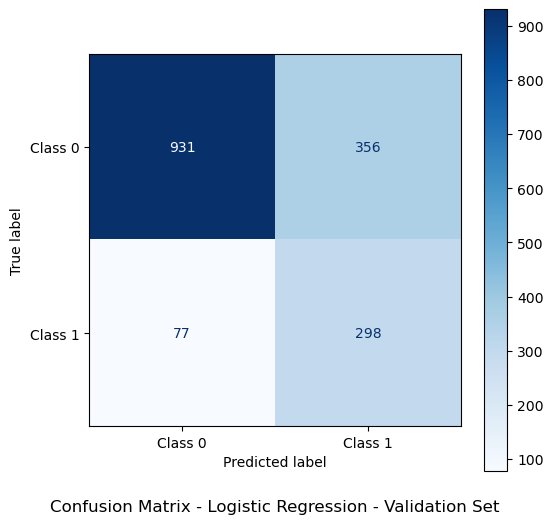


--- Evaluation Results on Logistic Regression - Test Set ---
Accuracy: 0.7342
Precision: 0.4491
Recall: 0.7739
F1 Score: 0.5684
ROC-AUC: 0.8187


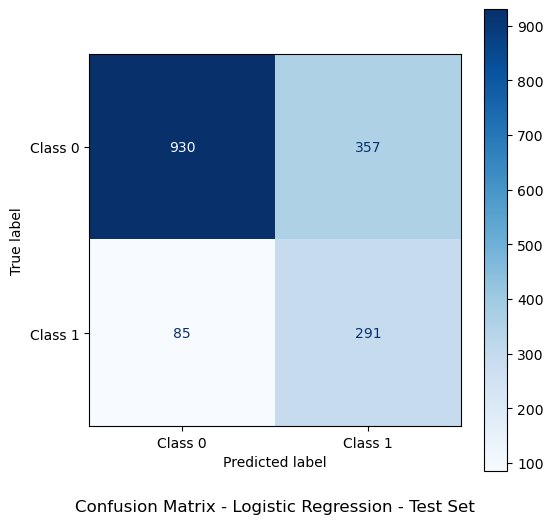

In [48]:
# 1. Initialize the model
model = LogisticRegression(random_state=42, solver='liblinear', max_iter=1000)

# 2. Train the model (FIT)
model.fit(X_train_resampled, y_train_resampled)
print("The model has been trained on X_train_resampled.")

def evaluate_model(model, X, y, set_name):
    # Predict probabilities (for ROC-AUC)
    y_pred_proba = model.predict_proba(X)[:, 1]
    # Predict classes (for the remaining metrics and Confusion Matrix)
    y_pred = model.predict(X)

    print(f"\n--- Evaluation Results on {set_name} ---")
    
    # 1. Performance metrics
    print(f"Accuracy: {accuracy_score(y, y_pred):.4f}")
    print(f"Precision: {precision_score(y, y_pred):.4f}")
    print(f"Recall: {recall_score(y, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y, y_pred):.4f}")
    print(f"ROC-AUC: {roc_auc_score(y, y_pred_proba):.4f}")

    # 2. Create and display the Confusion Matrix
    cm = confusion_matrix(y, y_pred)
    
    # Ensure labels are 0 and 1 (or your class labels)
    # Example: 'Class 0' (Negative) and 'Class 1' (Positive)
    display_labels = ['Class 0', 'Class 1'] 

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
    
    # Plot the Matrix
    fig, ax = plt.subplots(figsize=(6, 6))
    disp.plot(cmap='Blues', ax=ax, values_format='d')
    plt.title(f'Confusion Matrix - {set_name}', loc='center', y=-0.25)
    plt.show()

# Evaluate on the Validation set
evaluate_model(model, X_val_processed_df, y_val, "Logistic Regression - Validation Set")

# Assume 'model_best' is the model with tuned hyperparameters
model_best = model # In this example, we use the already trained model

# Evaluate on the Test set
evaluate_model(model_best, X_test_processed_df, y_test, "Logistic Regression - Test Set")

### Decision Tree


--- Experimenting with Decision Tree Model ---

--- Evaluation Results on Decision Tree - Validation Set ---
Accuracy: 0.9097
Precision: 0.7610
Recall: 0.8747
F1 Score: 0.8139
ROC-AUC: 0.9481


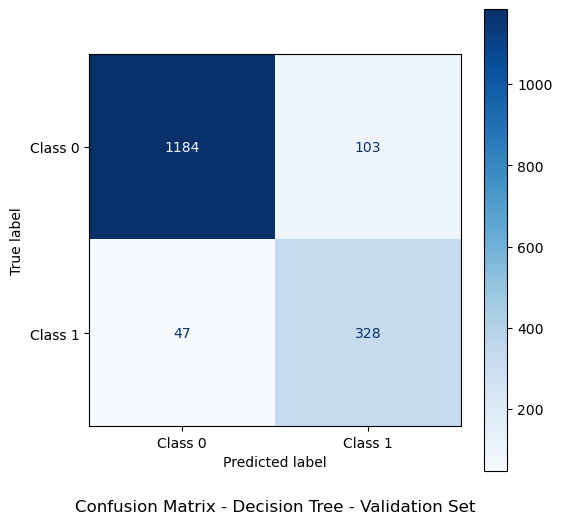


--- Evaluation Results on Decision Tree - Test Set ---
Accuracy: 0.9200
Precision: 0.7900
Recall: 0.8803
F1 Score: 0.8327
ROC-AUC: 0.9489


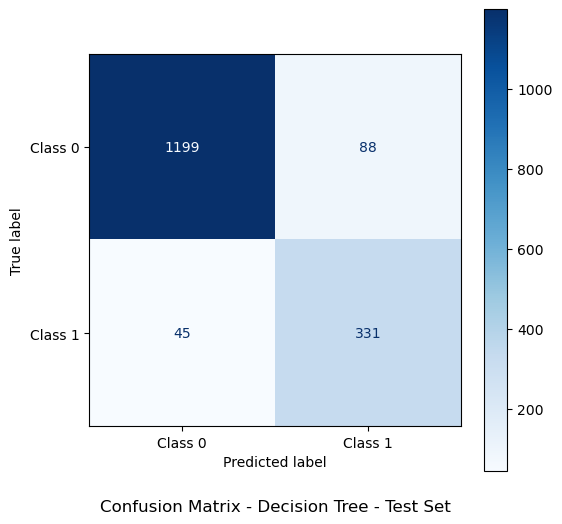

In [49]:
print("\n--- Experimenting with Decision Tree Model ---")

# 1. Initialize the Decision Tree model
# Limit the maximum depth (max_depth) to control overfitting
dt_model = DecisionTreeClassifier(
    max_depth=8, # Experiment with a smaller depth (e.g., 8)
    random_state=42
)

# 2. Train the model
# Train on the class-balanced set (X_train_resampled)
dt_model.fit(X_train_resampled, y_train_resampled)

# 3. Evaluate on the Validation set
evaluate_model(dt_model, X_val_processed_df, y_val, "Decision Tree - Validation Set")

# 4. Evaluate on the Test set
evaluate_model(dt_model, X_test_processed_df, y_test, "Decision Tree - Test Set")

### Random Forest


--- Experimenting with Random Forest Model ---

--- Evaluation Results on Random Forest - Validation Set ---
Accuracy: 0.9489
Precision: 0.8662
Recall: 0.9147
F1 Score: 0.8898
ROC-AUC: 0.9899


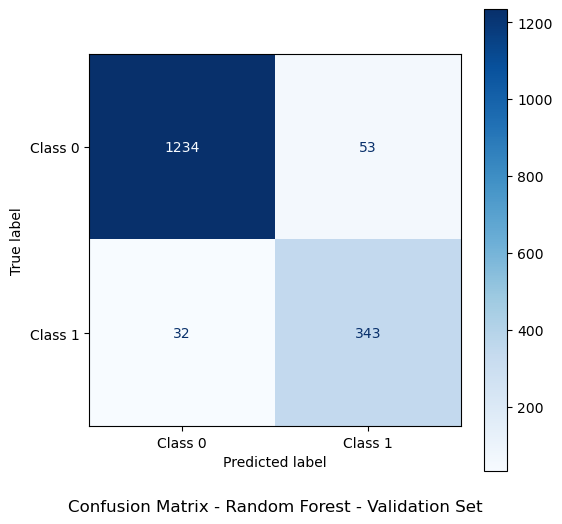


--- Evaluation Results on Random Forest - Test Set ---
Accuracy: 0.9627
Precision: 0.9132
Recall: 0.9229
F1 Score: 0.9180
ROC-AUC: 0.9920


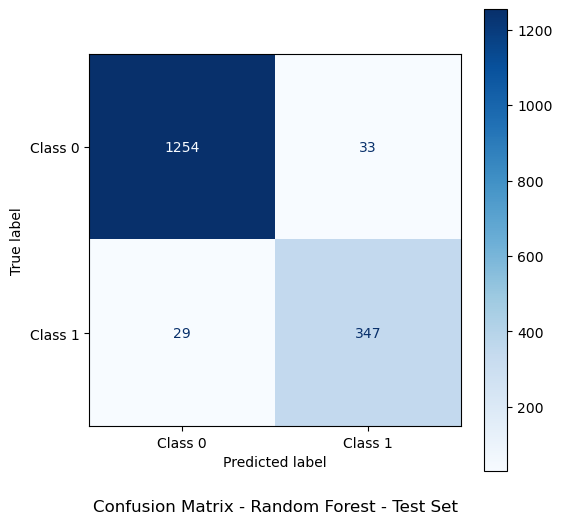

In [50]:
print("\n--- Experimenting with Random Forest Model ---")

# Initialize the Random Forest model
# Need to tune n_estimators (number of trees) and max_depth (maximum depth)
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10, # Limit depth to prevent overfitting
    random_state=42,
    n_jobs=-1
)

# Train the model
rf_model.fit(X_train_resampled, y_train_resampled)

# Evaluate on the Validation set
evaluate_model(rf_model, X_val_processed_df, y_val, "Random Forest - Validation Set")

# Evaluate on the Test set
evaluate_model(rf_model, X_test_processed_df, y_test, "Random Forest - Test Set")

## Model Selection

### Hyperparameter Tuning

# 4. Outlier Detection

## Clustering

## Elbow Method